## Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

Polynomial functions and kernel functions are both used in machine learning algorithms, particularly in the context of support vector machines (SVMs) and kernel methods.

1. **Polynomial Functions**: In the context of SVMs, polynomial functions are often used as kernel functions. These kernel functions compute the inner product between two feature vectors in a higher-dimensional space, allowing SVMs to learn non-linear decision boundaries in the original feature space. The polynomial kernel function is defined as 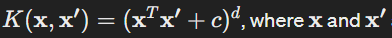 are the input feature vectors, \( d \) is the degree of the polynomial, and \( c \) is a constant.


2. **Kernel Functions**: Kernel functions are more general and can encompass various transformations of the input data to a higher-dimensional space. Besides polynomial kernels, other common kernel functions include Gaussian (or Radial Basis Function) kernels, sigmoid kernels, and more. These kernel functions allow SVMs to perform non-linear classification by implicitly mapping the input data into a higher-dimensional space where linear separation might be possible.

In summary, polynomial functions can be seen as a specific type of kernel function used in SVMs, where they facilitate learning non-linear decision boundaries by implicitly mapping data to a higher-dimensional space.

## Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SVM classifier with a polynomial kernel
svm_classifier = SVC(kernel='poly', degree=3)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.83


## Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

Increasing the value of epsilon in Support Vector Regression (SVR) leads to a **decrease** in the number of support vectors. Here's why:

* **Epsilon (ε):**  This parameter defines a tolerance zone around the hyperplane (decision function) in SVR. It essentially allows for a certain level of deviation from the perfect fit without incurring a penalty.

* **Support Vectors:** These are the data points that lie closest to the hyperplane within the tolerance zone (ε-tube) or on its margins. They significantly influence the position and shape of the hyperplane.

**Impact of Increasing Epsilon:**

* **Wider Tolerance Zone:**  A larger epsilon widens the tolerance zone around the hyperplane. This allows more data points to fall within the zone without being considered for errors.

* **Fewer Support Vectors:**  Since more points fall within the wider tolerance zone, fewer points will violate the margin and become support vectors. The model essentially becomes less strict about fitting the data points exactly, leading to a simpler model with fewer support vectors.

**Trade-off:**

* **Reduced Training Error:**  A larger epsilon can lead to a lower training error by allowing for more flexibility in fitting the data. 

* **Lower Accuracy:**  However, this comes at the cost of potentially lower accuracy on unseen data. A model with fewer support vectors might not capture the underlying relationships in the data as well, leading to less precise predictions for new data points.

**Choosing Epsilon:**

Selecting the optimal epsilon value involves finding a balance between reducing training error and maintaining good generalization (performance on unseen data). It's often achieved through cross-validation techniques where you experiment with different epsilon values and choose the one that yields the best performance on a validation set.


## Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

###  Effect of Parameters on Support Vector Regression (SVR) Performance

The performance of SVR is significantly influenced by the choice of kernel function and several key parameters:

**1. Kernel Function:**

* **Function:** The kernel function transforms the input data into a higher-dimensional feature space, allowing SVR to capture non-linear relationships between features that wouldn't be possible in the original space.

* **Impact:** The choice of kernel function significantly affects the model's ability to learn complex patterns. Common choices include:
    * **Linear Kernel:** Suitable for linear relationships but limited in capturing non-linearity.
    * **Polynomial Kernel:** Can capture non-linearity but prone to overfitting with high degrees.
    * **RBF Kernel:** A versatile kernel that works well for various data types and offers good balance between complexity and overfitting.

* **Example:** If your data exhibits a clear non-linear pattern, using a polynomial or RBF kernel might be preferable to a linear kernel.

**2. C Parameter (Regularization Parameter):**

* **Function:** Controls the trade-off between model complexity and training error. A higher C allows for a more complex model that fits the training data closely but can lead to overfitting.

* **Impact:**
    * **Increase C:** Reduces training error but increases risk of overfitting, especially with noisy data.
    * **Decrease C:** May lead to higher training error but can improve generalization (performance on unseen data).

* **Example:** If your training data has a lot of noise, you might want to decrease C to prevent the model from overfitting to the noise.

**3. Epsilon Parameter (ε):**

* **Function:** Defines a tolerance zone around the hyperplane (decision function) in SVR. It allows for a certain level of deviation from the perfect fit without incurring a penalty.

* **Impact:**
    * **Increase Epsilon:** Reduces training error by allowing more flexibility in fitting the data (fewer support vectors). However, it can decrease model accuracy on unseen data.
    * **Decrease Epsilon:**  Leads to a stricter model with lower training error but potentially lower accuracy if the model becomes too rigid.

* **Example:** If your primary concern is obtaining a smooth fit with a lower training error and you're less worried about perfect accuracy on unseen data, you might increase epsilon. 

**4. Gamma Parameter (RBF Kernel Specific):**

* **Function (For RBF Kernel Only):** Controls the influence of individual data points on the decision function. A higher gamma implies stronger influence from closer data points, leading to a more complex and potentially overfitting model.

* **Impact (For RBF Kernel Only):**
    * **Increase Gamma:** Leads to a more complex model that can capture intricate details but might overfit. 
    * **Decrease Gamma:** Creates a smoother, less complex model that might miss subtle patterns but can generalize better.

* **Example:** If your data has a lot of local variations you want to capture, you might increase gamma. Conversely, for smoother, generalizable trends, decrease gamma.

**Finding Optimal Values:**

The optimal values for these parameters depend on your specific data and desired model behavior. Techniques like grid search or randomized search can be used to explore different parameter combinations and identify the configuration that yields the best performance on a validation set.


## Q5. Assignment:
- Import the necessary libraries and load the dataset
- Split the dataset into training and testing sets
- Preprocess the data using any technique of your choice (e.g. scaling, normalization)
- Create an instance of the SVC classifier and train it on the training data
- Use the trained classifier to predict the labels of the testing data
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,recision, recall, F1-score)
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to improve its performance
- Train the tuned classifier on the entire dataset
- Save the trained classifier to a file for future use.

In [3]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

# Step 1: Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create an instance of the SVC classifier and train it on the training data
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Step 5: Use the trained classifier to predict the labels of the testing data
y_pred = svc.predict(X_test_scaled)

# Step 6: Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

# Step 8: Train the tuned classifier on the entire dataset
best_svc = grid_search.best_estimator_
best_svc.fit(X, y)

# Step 9: Save the trained classifier to a file
joblib.dump(best_svc, 'svm_classifier.pkl')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


['svm_classifier.pkl']